In [1]:
# import libary (Pandas for Data manipulation)
import pandas as pd

In [2]:
# load the dataset
df=pd.read_csv(r"C:\Users\subha\Downloads\netflix_titles.csv")

In [3]:
# Print first 5 rows
print(df.head)

<bound method NDFrame.head of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabal

In [4]:
# Check Basic Information about the dataset
print("Shape:", df.shape)

Shape: (8807, 12)


In [5]:
print("Missing value in each columns:", df.isnull().sum())

Missing value in each columns: show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

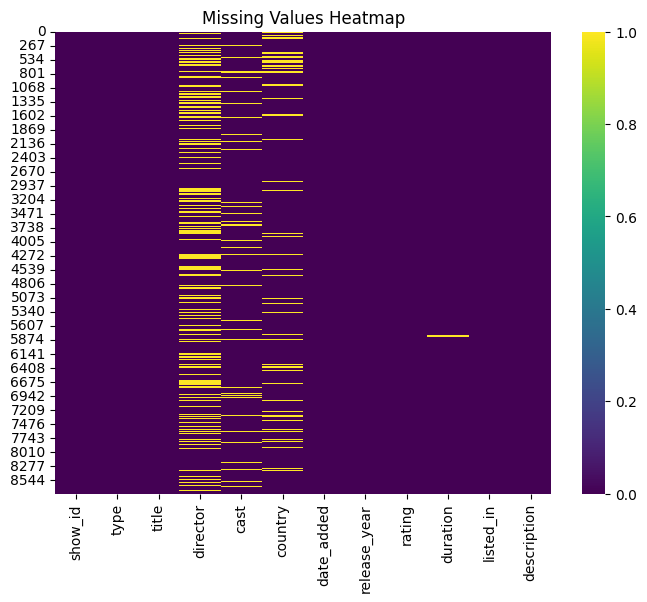

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [9]:
print("Data types:", df.dtypes)

Data types: show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [10]:
print("number of duplicats:", df.duplicated().sum())

number of duplicats: 0


In [11]:
# Handling missing values
df['director'].fillna("unknown")

0       Kirsten Johnson
1               unknown
2       Julien Leclercq
3               unknown
4               unknown
             ...       
8802      David Fincher
8803            unknown
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [12]:
df['cast'].fillna("NA")

0                                                      NA
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                      NA
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                                   NA
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [13]:
df['country'].fillna("unknown")

0       United States
1        South Africa
2             unknown
3             unknown
4               India
            ...      
8802    United States
8803          unknown
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [14]:
df['rating'].fillna("0")

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [15]:
df['duration'].fillna("0")

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [18]:
df['date_added'].fillna(method='ffill')

C:\Users\subha\AppData\Local\Temp\ipykernel_7952\138404842.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['date_added'].fillna(method='ffill')


0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [19]:
# Convert data types
df['date_added']=pd.to_datetime(df['date_added'], errors='coerce')

In [20]:
df['release_year']=df['release_year'].astype(int)

In [21]:
# Standardize text values
df['country']=df['country'].str.lower()

In [22]:
df['rating']=df['rating'].str.upper()

In [23]:
# Rename columns
df.columns = [col.strip().lower().replace(" ","_") for col in df.columns]

In [25]:
# Verify cleaned dataset
print("After cleaning Missing Values:", df.isnull().sum())

After cleaning Missing Values: show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        88
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [29]:
print("Data Types After Data cleaning:", df.dtypes)

Data Types After Data cleaning: show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object


In [34]:
# Save Cleaned Dataset
file = "netflix_titles_cleaned.csv"
df.to_csv(file, index=False)

print(f"✅ Cleaned dataset saved successfully as '{file}'")


✅ Cleaned dataset saved successfully as 'netflix_titles_cleaned.csv'
